Calculando 1000 pasos de integración orbital...


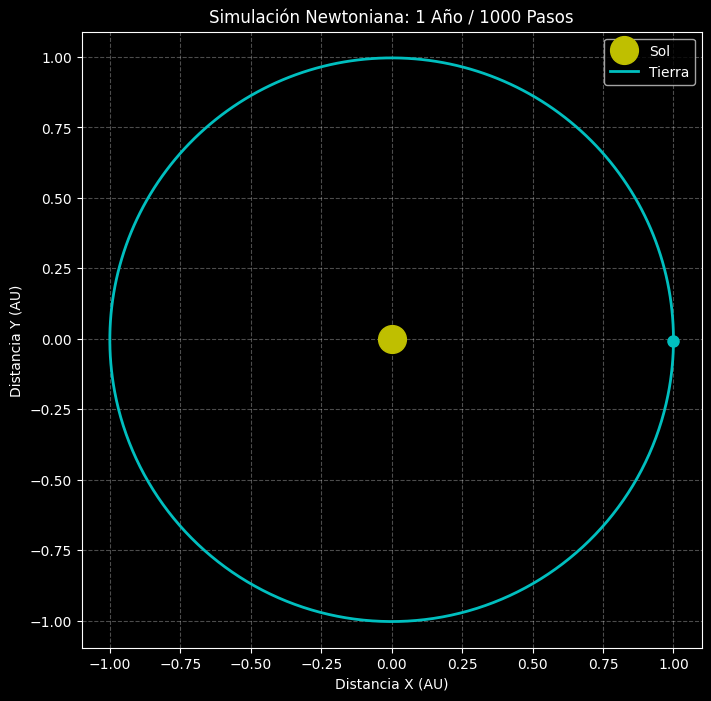

✅ Simulación finalizada con éxito.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. CONFIGURACIÓN DEL UNIVERSO ---
# Usaremos Unidades Astronómicas (AU) y Años para simplificar la matemática
G = 4 * np.pi**2   # Constante de gravedad ajustada a estas unidades
M_sun = 1.0        # Masa del Sol (1 masa solar)

# --- 2. CONDICIONES INICIALES (La Tierra) ---
# Posición [x, y]: Empezamos a 1 AU de distancia
r = np.array([1.0, 0.0]) 
# Velocidad [vx, vy]: 2*pi AU/año (aprox 30 km/s) hacia arriba
v = np.array([0.0, 2*np.pi]) 

# --- 3. TIEMPO (El Reloj) ---
dt = 0.001         # Calculamos cada "0.001 años" (aprox 8 horas)
t_max = 1.0        # Simular 1 año completo
steps = int(t_max / dt)

# Arrays para guardar el historial
history_x = []
history_y = []

# --- 4. MOTOR DE FÍSICA (Loop Principal) ---
print(f"Calculando {steps} pasos de integración orbital...")

for i in range(steps):
    # Guardar posición actual
    history_x.append(r[0])
    history_y.append(r[1])
    
    # Calcular distancia al centro (Teorema de Pitágoras 3D)
    distance = np.linalg.norm(r)
    
    # Ley de Gravitación Universal de Newton (Vectorial)
    # Aceleración = -G * M / r^3 * vector_posición
    a = -G * M_sun / (distance**3) * r
    
    # Integración Numérica (Método Euler-Cromer)
    v = v + a * dt  # Actualizar velocidad
    r = r + v * dt  # Actualizar posición

# --- 5. VISUALIZACIÓN (Matplotlib) ---
plt.style.use('dark_background') # Modo Hacker/Espacial
plt.figure(figsize=(8, 8))

# Pintar el Sol
plt.plot(0, 0, 'yo', markersize=20, label='Sol') 
# Pintar la Tierra
plt.plot(history_x, history_y, 'c-', linewidth=2, label='Tierra')
# Pintar posición final
plt.plot(history_x[-1], history_y[-1], 'co', markersize=8)

plt.title(f"Simulación Newtoniana: 1 Año / {steps} Pasos")
plt.xlabel("Distancia X (AU)")
plt.ylabel("Distancia Y (AU)")
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.axis('equal') # Para que sea un círculo y no un óvalo

plt.show()
print("✅ Simulación finalizada con éxito.")